## importing the data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
# import matplotlib.pyplot as plt
from fbprophet import Prophet

In [12]:
import os

os.getcwd()

'D:\\sidjh\\ML notebook\\Exercise'

In [17]:
chicago_df_1 = pd.read_csv('D:\\sidjh\\ML notebook\\Exercise\\datasets\\Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
chicago_df_2 = pd.read_csv('D:\\sidjh\\ML notebook\\Exercise\\datasets\\Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
chicago_df_3 = pd.read_csv('D:\\sidjh\\ML notebook\\Exercise\\datasets\\Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [19]:
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3])

In [20]:
chicago_df_1.shape

(1872343, 23)

In [21]:
chicago_df.shape

(6017767, 23)

In [24]:
chicago_df.tail(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456704,6249417,10508666,HZ250497,05/03/2016 11:30:00 PM,053XX S PULASKI RD,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,...,23.0,62.0,03,1150606.0,1868988.0,2016,05/10/2016 03:56:50 PM,41.796397,-87.723251,"(41.79639731, -87.723251281)"
1456705,6249592,10508671,HZ250526,05/03/2016 11:50:00 PM,036XX E 106TH ST,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,ALLEY,True,...,10.0,52.0,26,1202327.0,1835278.0,2016,05/10/2016 03:56:50 PM,41.702731,-87.534736,"(41.702731182, -87.534736413)"
1456706,6249615,10508672,HZ250441,05/03/2016 10:25:00 PM,071XX S MOZART ST,0460,BATTERY,SIMPLE,SIDEWALK,True,...,18.0,66.0,08B,1158610.0,1857066.0,2016,05/10/2016 03:56:50 PM,41.763522,-87.694225,"(41.763522012, -87.69422464)"
1456707,6249936,10508675,HZ250502,05/03/2016 11:00:00 PM,085XX S MAY ST,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,...,21.0,71.0,03,1170146.0,1848113.0,2016,05/10/2016 03:56:50 PM,41.738711,-87.652203,"(41.738710803, -87.652202523)"
1456708,6250154,10508678,HZ250481,05/03/2016 11:28:00 PM,088XX S LAFLIN ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,21.0,71.0,04B,1167880.0,1846134.0,2016,05/10/2016 03:56:50 PM,41.733329,-87.660561,"(41.733329054, -87.660561367)"
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


In [25]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

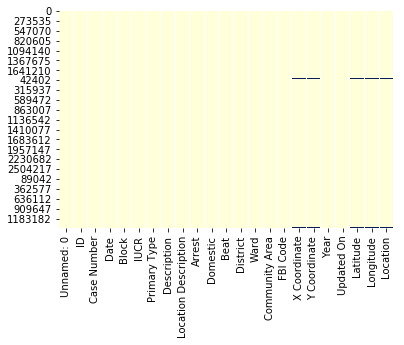

In [28]:
sns.heatmap(chicago_df.isnull(), cbar=False, cmap='YlGnBu')

In [31]:
chicago_df.drop(['Unnamed: 0', 'Case Number','ID','IUCR','X Coordinate','Y Coordinate','Updated On', 'Year','FBI Code','Beat','Ward','Community Area','Location','District','Latitude','Longitude'], inplace = True, axis=1)

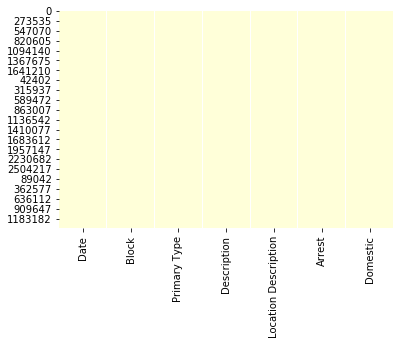

In [32]:
sns.heatmap(chicago_df.isnull(), cbar=False, cmap='YlGnBu')

In [33]:
chicago_df.Date = pd.to_datetime(chicago_df.Date,format='%m/%d/%Y %I:%M:%S %p')

In [34]:
chicago_df.Date

0         2006-04-02 13:00:00
1         2006-02-26 13:40:48
2         2006-01-08 23:16:00
3         2006-04-05 18:45:00
4         2006-02-17 21:03:14
5         2006-03-30 22:30:00
6         2006-04-05 12:10:00
7         2006-04-05 15:00:00
8         2006-04-05 21:30:00
9         2006-04-03 03:00:00
10        2006-04-06 11:15:00
11        2006-04-04 20:15:00
12        2006-04-06 11:30:00
13        2006-02-26 14:47:21
14        2006-04-03 20:09:00
15        2006-02-17 21:26:33
16        2006-04-05 08:00:00
17        2006-03-31 08:20:00
18        2006-04-05 13:30:00
19        2006-03-31 05:00:00
20        2006-03-28 22:00:00
21        2006-02-17 21:49:21
22        2006-04-05 18:18:00
23        2006-04-06 09:45:00
24        2006-03-31 09:13:54
25        2006-04-05 22:30:00
26        2006-04-05 22:10:00
27        2006-03-31 10:00:00
28        2006-02-17 22:07:09
29        2006-04-05 17:00:00
                  ...        
1456684   2016-05-03 22:32:00
1456685   2016-05-03 22:07:00
1456686   

In [47]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [48]:
chicago_df['Primary Type'].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

In [49]:
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         1245111
BATTERY                       1079178
CRIMINAL DAMAGE                702702
NARCOTICS                      674831
BURGLARY                       369056
OTHER OFFENSE                  368169
ASSAULT                        360244
MOTOR VEHICLE THEFT            271624
ROBBERY                        229467
DECEPTIVE PRACTICE             225180
CRIMINAL TRESPASS              171596
PROSTITUTION                    60735
WEAPONS VIOLATION               60335
PUBLIC PEACE VIOLATION          48403
OFFENSE INVOLVING CHILDREN      40260
Name: Primary Type, dtype: int64

In [50]:
order = chicago_df['Primary Type'].value_counts().iloc[:15].index

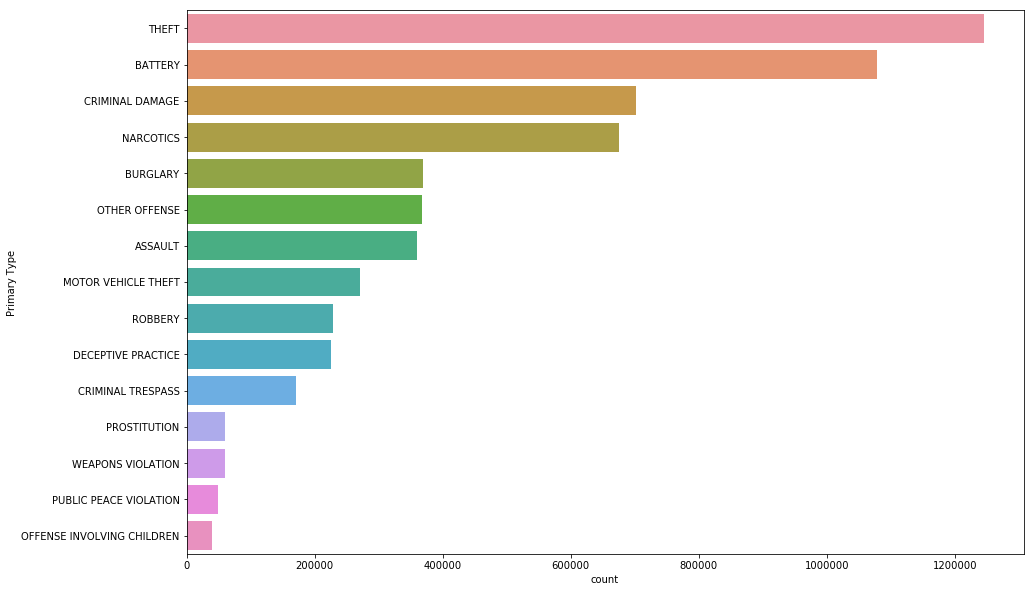

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type', data=chicago_df,order=order)

In [52]:
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

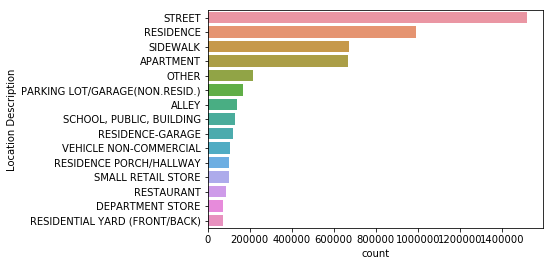

In [53]:
sns.countplot(y="Location Description",data=chicago_df,order=chicago_df['Location Description'].value_counts().iloc[:15].index)

In [56]:
chicago_df.resample('Y').size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

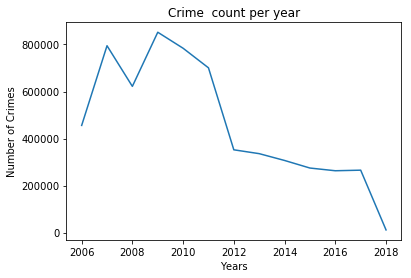

In [57]:
plt.plot(chicago_df.resample('Y').size())
plt.title('Crime  count per year')
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

Text(0, 0.5, 'Number of Crimes')

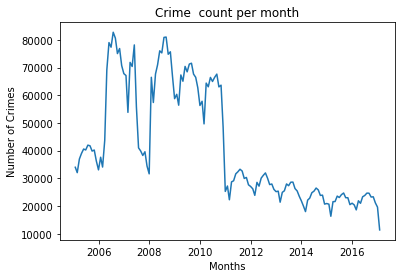

In [59]:
plt.plot(chicago_df.resample('m').size())
plt.title('Crime  count per month')
plt.xlabel("Months")
plt.ylabel("Number of Crimes")

Text(0, 0.5, 'Number of Crimes')

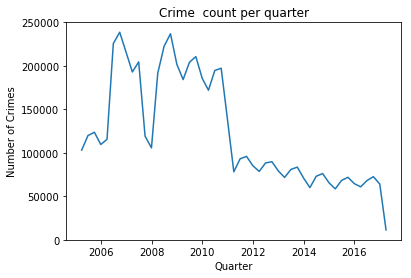

In [60]:
plt.plot(chicago_df.resample('Q').size())
plt.title('Crime  count per quarter')
plt.xlabel("Quarter")
plt.ylabel("Number of Crimes")

## preparing the data

In [61]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [62]:
chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
5,2005-06-30,40234
6,2005-07-31,41976
7,2005-08-31,41741
8,2005-09-30,39833
9,2005-10-31,40204


In [63]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [64]:
chicago_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
5,2005-06-30,40234
6,2005-07-31,41976
7,2005-08-31,41741
8,2005-09-30,39833
9,2005-10-31,40204


In [65]:
chicago_prophet_df_final = chicago_prophet.rename(columns= {'Date':'ds',"Crime Count":'y'})

In [66]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
5,2005-06-30,40234
6,2005-07-31,41976
7,2005-08-31,41741
8,2005-09-30,39833
9,2005-10-31,40204


## make predictions

In [67]:
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [77]:
future = m.make_future_dataframe(periods=720)
forecast = m.predict(future)

In [78]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60454.773642,38159.052472,72677.552301,60454.773642,60454.773642,-4762.404217,-4762.404217,-4762.404217,-4762.404217,-4762.404217,-4762.404217,0.0,0.0,0.0,55692.369426
1,2005-02-28,60322.370911,34814.084218,67108.023312,60322.370911,60322.370911,-9500.516358,-9500.516358,-9500.516358,-9500.516358,-9500.516358,-9500.516358,0.0,0.0,0.0,50821.854553
2,2005-03-31,60175.782173,42786.976896,76081.029605,60175.782173,60175.782173,-1224.151952,-1224.151952,-1224.151952,-1224.151952,-1224.151952,-1224.151952,0.0,0.0,0.0,58951.630221
3,2005-04-30,60033.922104,45709.979008,77561.825402,60033.922104,60033.922104,1182.829000,1182.829000,1182.829000,1182.829000,1182.829000,1182.829000,0.0,0.0,0.0,61216.751104
4,2005-05-31,59887.333366,48723.784639,81288.690119,59887.333366,59887.333366,5498.247964,5498.247964,5498.247964,5498.247964,5498.247964,5498.247964,0.0,0.0,0.0,65385.581330
5,2005-06-30,59745.473296,46933.836105,80547.978459,59745.473296,59745.473296,3576.966082,3576.966082,3576.966082,3576.966082,3576.966082,3576.966082,0.0,0.0,0.0,63322.439378
6,2005-07-31,59598.884555,46635.581972,80640.267370,59598.884555,59598.884555,4582.849351,4582.849351,4582.849351,4582.849351,4582.849351,4582.849351,0.0,0.0,0.0,64181.733907
7,2005-08-31,59452.295814,47923.252887,81192.225010,59452.295814,59452.295814,4498.965423,4498.965423,4498.965423,4498.965423,4498.965423,4498.965423,0.0,0.0,0.0,63951.261237
8,2005-09-30,59310.435742,44034.518213,77501.200381,59310.435742,59310.435742,1749.360219,1749.360219,1749.360219,1749.360219,1749.360219,1749.360219,0.0,0.0,0.0,61059.795961
9,2005-10-31,59163.847001,44971.378239,77505.313267,59163.847001,59163.847001,2397.444549,2397.444549,2397.444549,2397.444549,2397.444549,2397.444549,0.0,0.0,0.0,61561.291550


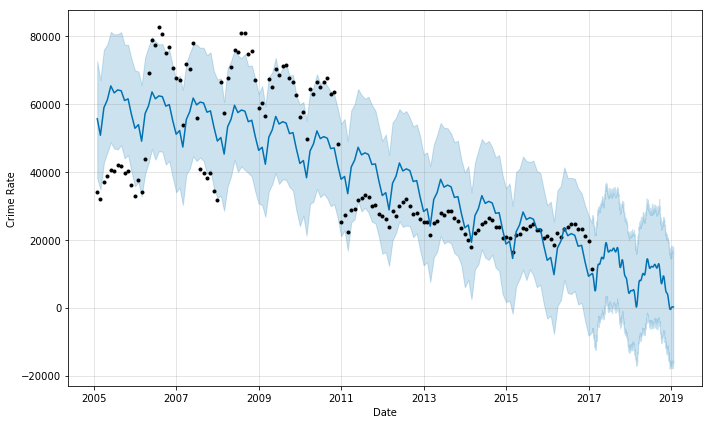

In [79]:
figure = m.plot(forecast, xlabel='Date',ylabel='Crime Rate')

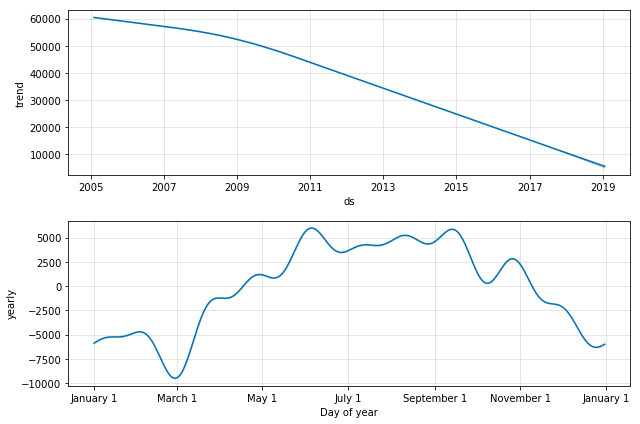

In [80]:
figure = m.plot_components(forecast)